## Analysis 4

1. Relationship between age and reported injuries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy

In [3]:
#Reading the required files
df1=pd.read_csv(r"NEISS Data/NEISS2014.csv")
df2=pd.read_csv(r"NEISS Data/BodyParts.csv")

In [4]:
#Performing a left join to combine the body part code of df1 with the body part name in df2
df3=pd.merge(df1,df2, how="left", left_on="body_part",right_on="Code")

In [5]:
#Based on the coding scheme, ages less than two years are coded as 200 (2 followed by months) and above
#We can code values greater than 200 as 1 and retain other values 
#Creating a new column for this purpose
df3.loc[df1['age']==0,'age_year'] = 1
df3.loc[df1['age']>=200,'age_year'] = 1
df3.loc[(df1['age']<200)&(df1['age']>0),'age_year'] = df1['age']

In [6]:
#Creating bins of ages to categorize people into various group and find what kind of inguries they encounter
ranges = [0,2,12,18,65,150]
age_groups = ['Infant', 'Children', 'Adolescents', 'Adults','Older Adults']
categories = pd.cut(df3['age_year'], ranges, labels=age_groups)
df3['categories'] = pd.cut(df3['age_year'], ranges, labels=age_groups)

In [7]:
#Calculating number of people injured in each category based on body part 
df5=df3.groupby(['categories','BodyPart'])['BodyPart'].agg({'Frequency':'count'}).reset_index()

In [8]:
#Sorting for each age group 
df6=df5.sort_values(['categories','Frequency'],ascending=[True,False]).reset_index(drop=True)

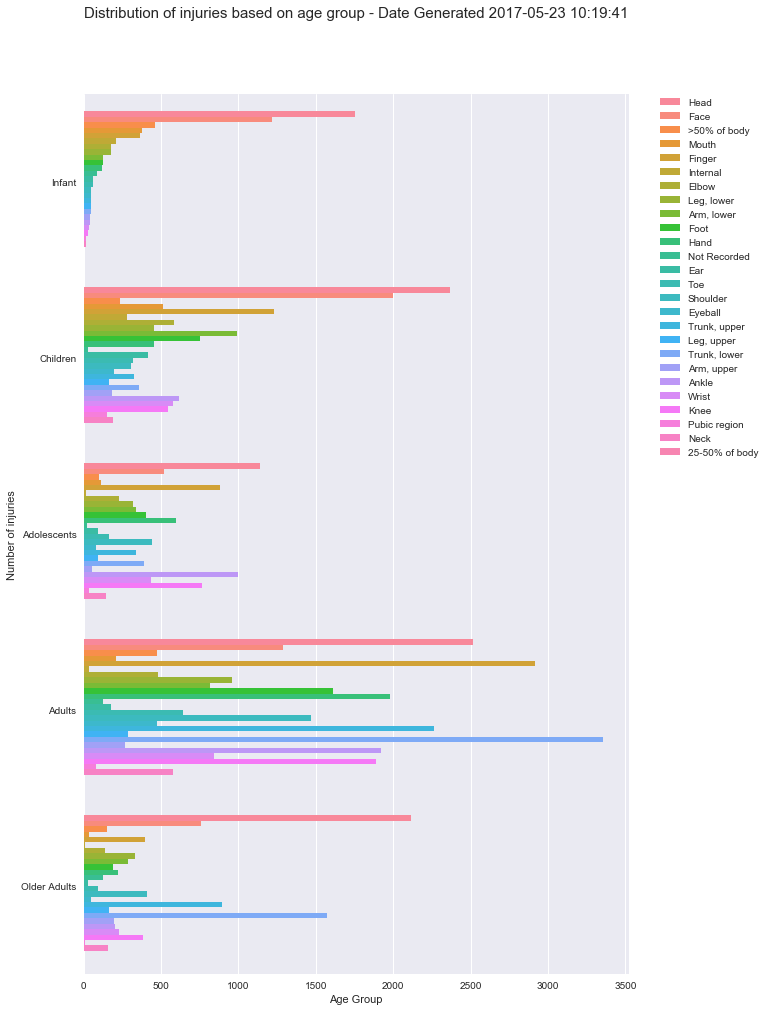

In [9]:
#Visualizing data 
g=sns.factorplot(x="Frequency",y="categories",hue="BodyPart",data=df6,saturation=1.2,size=13,aspect=0.7,kind="bar",legend=False)


plt.title('Distribution of injuries based on age group - Date Generated '+str(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')),fontsize=15,y=1.08)
plt.xlabel('Age Group')
plt.ylabel('Number of injuries')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig1 = plt.gcf()
plt.show()

### Conclusion

* From this analysis we can  infer that when people are young (infants,children) they tend to have injuries on the face (head and face injuries) which could be because they tend to fall while playing and hurt themselves.
* But for  adults, most of the injuries are in the arms and finger regions which could be because they tend to do a lot of work (household work, cooking etc.) during this age group. 
* As people tend to grow older, we again seem to notice more injuries on the head which might be because they grow older and fall often (due to weakness and lack of support)
* We can also observe that in this dataset, the maximum number of injuries are for the adults compared to other age groups


#### References
* http://www.widener.edu/about/campus_resources/wolfgram_library/documents/life_span_chart_final.pdf - To categorize people based on ages